1)    Use the cleaned data which you have obtained at the end of Exploratory Data
    Analysis in Capstone Project-1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-subscribed_19.csv')

In [3]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [4]:
#will display the top 10 observations of the dataset
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1.0,-1.0,0.0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1.0,-1.0,0.0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1.0,-1.0,0.0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1.0,-1.0,0.0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1.0,-1.0,0.0,NaN,no


In [5]:
#will display the last 5 observations of the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no
8040,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [7]:
df.shape

(8041, 17)

In [8]:
 #let check for duplicates values( no duplicates values)
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8036    False
8037    False
8038    False
8039    False
8040    False
Length: 8041, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB


In [10]:
#lets check for duplicates if any
df.nunique()

age            42
job            11
marital         3
education       3
default         2
balance      3076
housing         2
loan            2
contact         0
day            20
month           2
duration     1023
campaign       35
pdays           1
previous        1
poutcome        0
Target          2
dtype: int64

In [11]:
#calculate the percentage of missing values in each column
(df.isnull().sum()/(len(df)))*100

age            0.000000
job            0.273598
marital        0.000000
education      4.688472
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
contact      100.000000
day            0.000000
month          0.000000
duration       0.000000
campaign       0.012436
pdays          0.012436
previous       0.012436
poutcome     100.000000
Target         0.012436
dtype: float64

In [12]:
# let see if they are sitll some object value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB


In [13]:
df.describe()

,age,balance,contact,day,duration,campaign,pdays,previous,poutcome
count,8041.000000,8041.000000,0.0,8041.000000,8041.000000,8040.000000,8040.0,8040.0,0.0
mean,39.446835,1012.994901,NaN,17.554409,264.993160,2.538557,-1.0,0.0,NaN
std,9.244936,2470.228317,NaN,8.285143,249.772337,2.850901,0.0,0.0,NaN
min,20.000000,-3372.000000,NaN,2.000000,0.000000,1.000000,-1.0,0.0,NaN
25%,32.000000,40.000000,NaN,9.000000,118.000000,1.000000,-1.0,0.0,NaN
50%,38.000000,323.000000,NaN,16.000000,193.000000,2.000000,-1.0,0.0,NaN
75%,46.000000,1026.000000,NaN,26.000000,322.000000,3.000000,-1.0,0.0,NaN
max,61.000000,58544.000000,NaN,30.000000,3366.000000,63.000000,-1.0,0.0,NaN


# Data cleaning 
# 1. Handling nan values
# 2.Drop rows with missing values

In [14]:
# List of columns to fill NaN values
columns_to_fill = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'Target']

# Fill NaN values in the specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(df['Target'].mode()[0])

# Display the cleaned dataset
print(df)

      age           job   marital  education default  balance housing loan  \
0      58    management   married   tertiary      no     2143     yes   no   
1      44    technician    single  secondary      no       29     yes   no   
2      33  entrepreneur   married  secondary      no        2     yes  yes   
3      47   blue-collar   married         no      no     1506     yes   no   
4      33            no    single         no      no        1      no   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
8036   45      services   married  secondary      no      759     yes   no   
8037   29    management    single   tertiary      no      144     yes   no   
8038   39      services  divorced  secondary      no      892     yes   no   
8039   32      services   married  secondary      no      109     yes   no   
8040   35     housemaid    single   tertiary      no      608     yes  yes   

      contact  day month  duration  campaign  pdays  previous  

In [15]:
df.drop(['contact', 'poutcome','previous','pdays','campaign'], axis=1, inplace=True)

print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'Target'],
      dtype='object')


In [16]:
#calculate the percentage of missing values in each column
(df.isnull().sum()/(len(df)))*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
Target       0.0
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
cleaned_df=df.dropna()

In [19]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
Target       0
dtype: int64

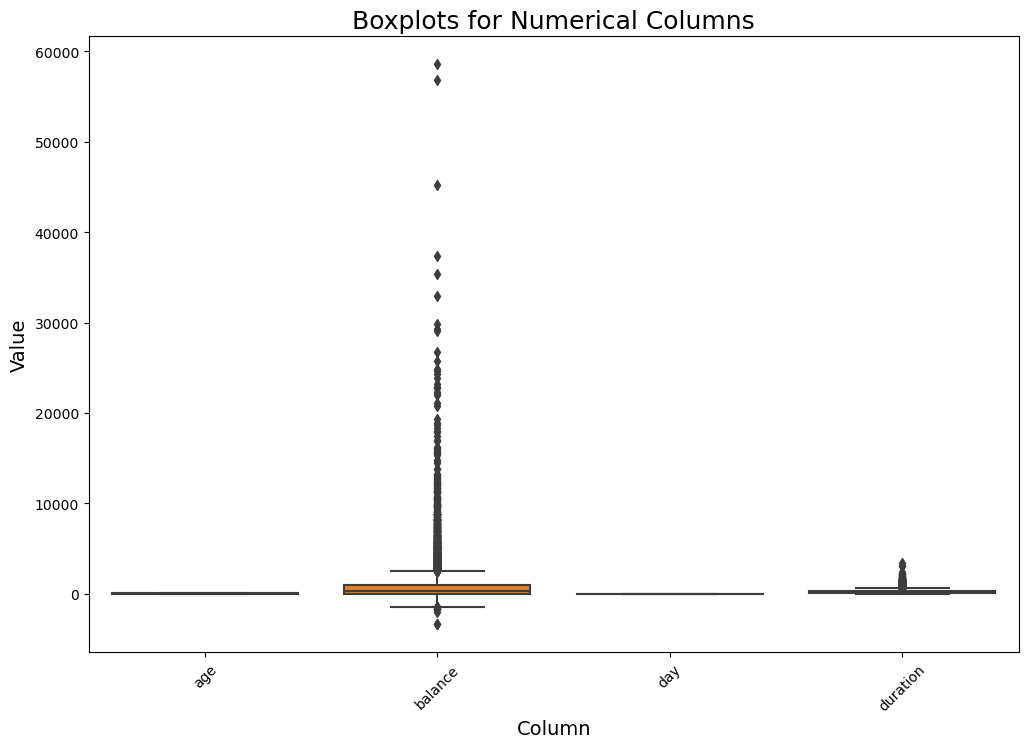

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only numerical columns for the boxplot
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.title('Boxplots for Numerical Columns', size=18)
plt.xlabel('Column', size=14)
plt.ylabel('Value', size=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


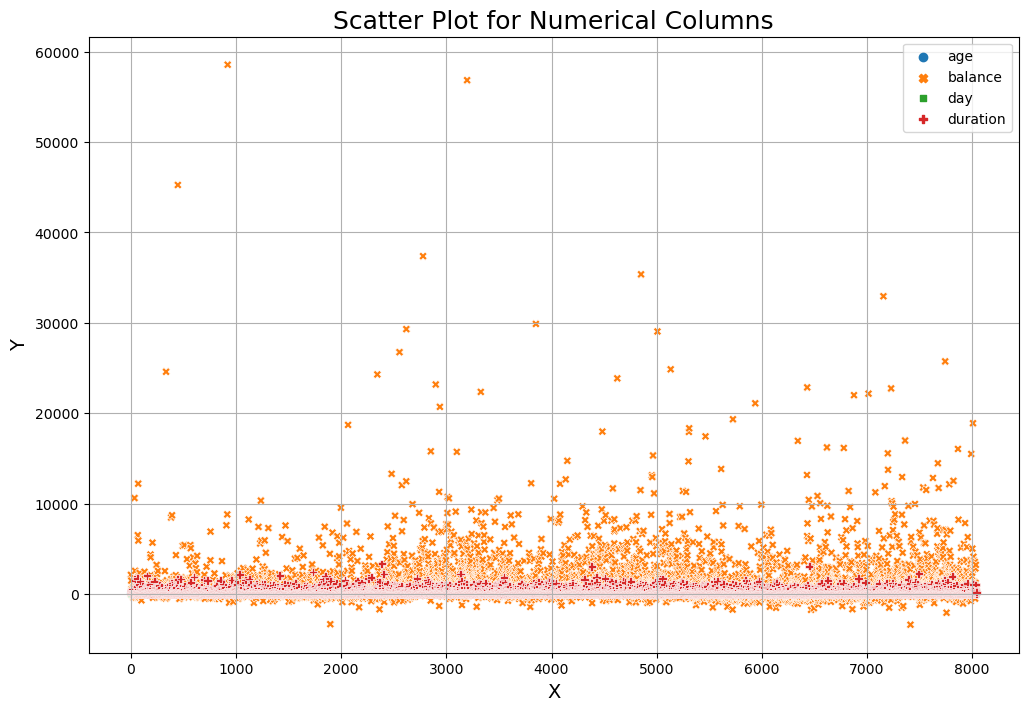

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only numerical columns for the scatter plot
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Create scatter plots for each pair of numerical columns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=numerical_columns)
plt.title('Scatter Plot for Numerical Columns', size=18)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.grid(True)  # Add grid lines
plt.show()


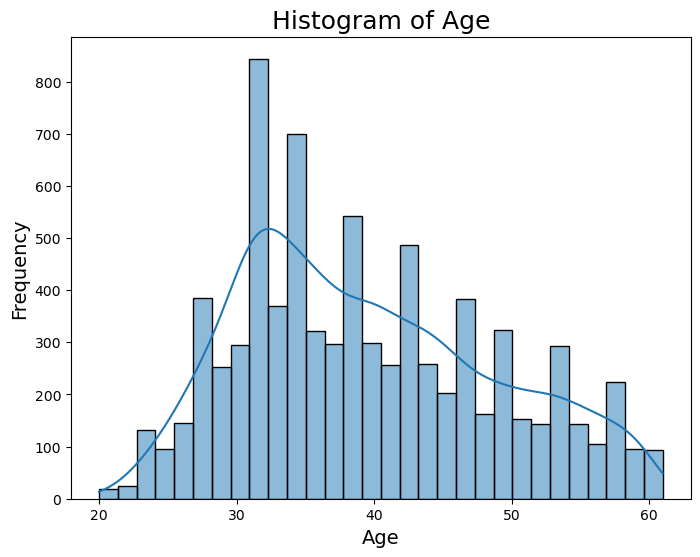

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'age' is the column you want to visualize

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Histogram of Age', size=18)
plt.xlabel('Age', size=14)
plt.ylabel('Frequency', size=14)
plt.show()


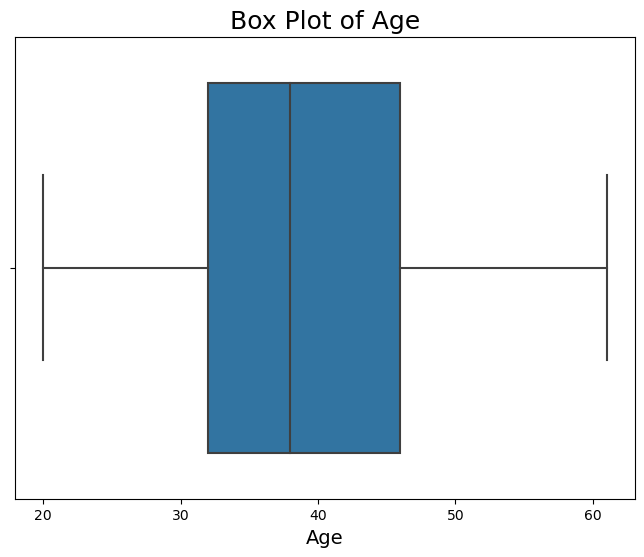

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'age' is the column you want to visualize

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age')
plt.title('Box Plot of Age', size=18)
plt.xlabel('Age', size=14)
plt.show()


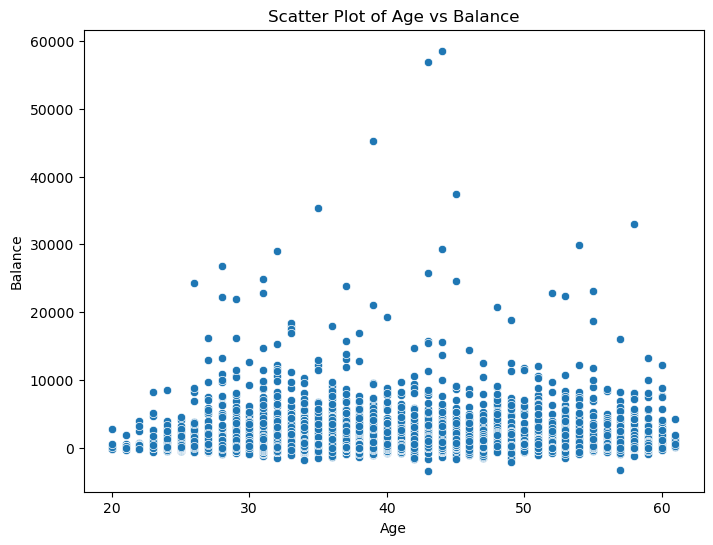

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


In [25]:
# Correlation analysis
correlation_matrix = df[['age', 'balance']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             age  balance
age      1.00000  0.05622
balance  0.05622  1.00000


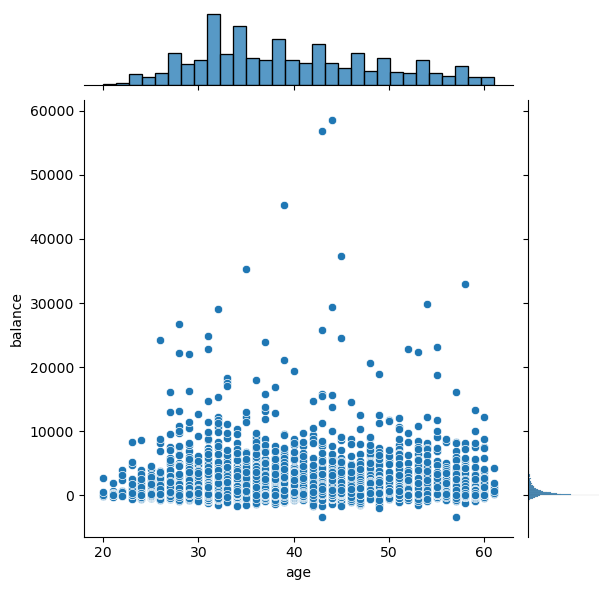

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot
sns.jointplot(x='age', y='balance', data=df, kind='scatter')
plt.show()


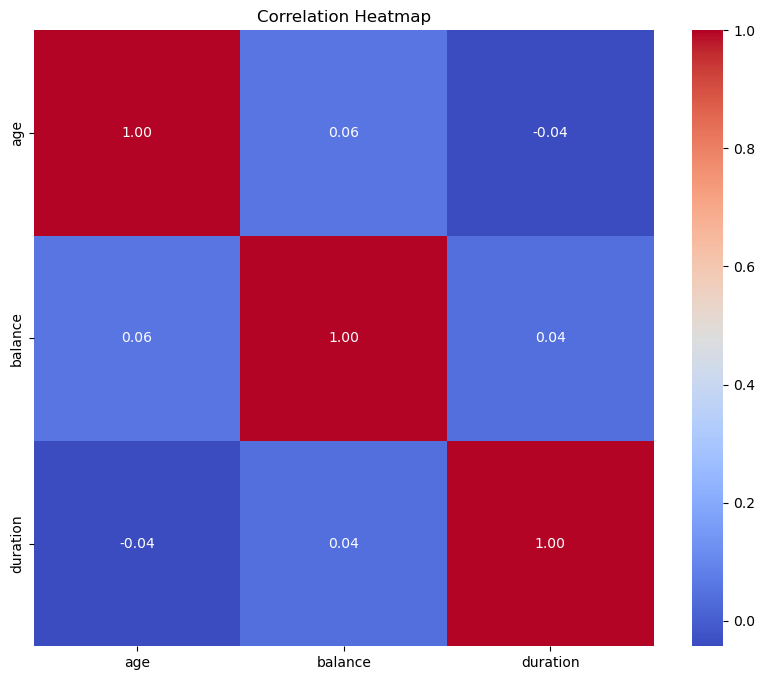

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'balance', 'duration',]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# PART 1

# Q 1a
Analyse the dataset and identify the task to be performed whether it is regression or classification.

In [28]:
# Analyze the unique values in the 'Target' column
unique_values = df['Target'].unique()

In [29]:
# Print the unique values to understand the nature of the target variable
print("Unique Values in 'Target':", unique_values)


Unique Values in 'Target': ['no' 'yes']


# Q1b
    Perform the steps below to build any 5 machine learning models to perform regression or classification tasks considering the dataset.
1. Data Splitting – Split the data into training and testing datasets.
2. Build the model using training dataset
3. Make predictions using the built model on test dataset.
4. Evaluate model using appropriate evaluation metrics


        


In [30]:
# Check if the 'Target' variable is continuous or categorical
target_type = "Regression" if df['Target'].dtype == 'float64' else "Classification"
print("Task Type:", target_type)


Task Type: Classification


In [31]:
# Remove NaN values only from specific columns (e.g., 'Target' column)
df_cleaned_subset = df.dropna(subset=['Target'])

# Display the cleaned dataset with NaN values removed from the 'Target' column
print(df_cleaned_subset)


      age           job   marital  education default  balance housing loan  \
0      58    management   married   tertiary      no     2143     yes   no   
1      44    technician    single  secondary      no       29     yes   no   
2      33  entrepreneur   married  secondary      no        2     yes  yes   
3      47   blue-collar   married         no      no     1506     yes   no   
4      33            no    single         no      no        1      no   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
8036   45      services   married  secondary      no      759     yes   no   
8037   29    management    single   tertiary      no      144     yes   no   
8038   39      services  divorced  secondary      no      892     yes   no   
8039   32      services   married  secondary      no      109     yes   no   
8040   35     housemaid    single   tertiary      no      608     yes  yes   

      day month  duration Target  
0       5   may       261   

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1]) 
df.iloc[:,2] = le.fit_transform(df.iloc[:,2]) 
df.iloc[:,3] = le.fit_transform(df.iloc[:,3]) 
df.iloc[:,4] = le.fit_transform(df.iloc[:,4])  
df.iloc[:,6] = le.fit_transform(df.iloc[:,6]) 
df.iloc[:,7] = le.fit_transform(df.iloc[:,7]) 
df.iloc[:,9] = le.fit_transform(df.iloc[:,9]) 
df.iloc[:,10] = le.fit_transform(df.iloc[:,10]) 

print(df)
df.info()

      age job marital education default  balance housing loan  day month  \
0      58   4       1         3       0     2143       1    0    5     1   
1      44  10       2         2       0       29       1    0    5     1   
2      33   2       1         2       0        2       1    1    5     1   
3      47   1       1         0       0     1506       1    0    5     1   
4      33   5       2         0       0        1       0    0    5     1   
...   ...  ..     ...       ...     ...      ...     ...  ...  ...   ...   
8036   45   8       1         2       0      759       1    0    2     0   
8037   29   4       2         3       0      144       1    0    2     0   
8038   39   8       0         2       0      892       1    0    2     0   
8039   32   8       1         2       0      109       1    0    2     0   
8040   35   3       2         3       0      608       1    1    2     0   

      duration Target  
0          259     no  
1          149     no  
2           74 

In [33]:
# Drop rows with NaN values
df_cleaned = df.dropna()

# Display the cleaned dataset
print(df_cleaned)

      age job marital education default  balance housing loan  day month  \
0      58   4       1         3       0     2143       1    0    5     1   
1      44  10       2         2       0       29       1    0    5     1   
2      33   2       1         2       0        2       1    1    5     1   
3      47   1       1         0       0     1506       1    0    5     1   
4      33   5       2         0       0        1       0    0    5     1   
...   ...  ..     ...       ...     ...      ...     ...  ...  ...   ...   
8036   45   8       1         2       0      759       1    0    2     0   
8037   29   4       2         3       0      144       1    0    2     0   
8038   39   8       0         2       0      892       1    0    2     0   
8039   32   8       1         2       0      109       1    0    2     0   
8040   35   3       2         3       0      608       1    1    2     0   

      duration Target  
0          259     no  
1          149     no  
2           74 

In [34]:
df_cleaned = df.dropna()
df['Target'].fillna(df['Target'].mode()[0], inplace=True)  # Replace NaN in 'Target' with mode


In [35]:
# Drop rows with NaN values
df_cleaned = df.dropna()

# Display the cleaned dataset
print(df_cleaned)


      age job marital education default  balance housing loan  day month  \
0      58   4       1         3       0     2143       1    0    5     1   
1      44  10       2         2       0       29       1    0    5     1   
2      33   2       1         2       0        2       1    1    5     1   
3      47   1       1         0       0     1506       1    0    5     1   
4      33   5       2         0       0        1       0    0    5     1   
...   ...  ..     ...       ...     ...      ...     ...  ...  ...   ...   
8036   45   8       1         2       0      759       1    0    2     0   
8037   29   4       2         3       0      144       1    0    2     0   
8038   39   8       0         2       0      892       1    0    2     0   
8039   32   8       1         2       0      109       1    0    2     0   
8040   35   3       2         3       0      608       1    1    2     0   

      duration Target  
0          259     no  
1          149     no  
2           74 

In [36]:
# List of columns to fill NaN values
columns_to_fill = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month','Target']

# Fill NaN values in the specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(df['Target'].mode()[0])

# Display the cleaned dataset
print(df)


      age  job  marital  education  default  balance  housing  loan  day  \
0      58    4        1          3        0     2143        1     0    5   
1      44   10        2          2        0       29        1     0    5   
2      33    2        1          2        0        2        1     1    5   
3      47    1        1          0        0     1506        1     0    5   
4      33    5        2          0        0        1        0     0    5   
...   ...  ...      ...        ...      ...      ...      ...   ...  ...   
8036   45    8        1          2        0      759        1     0    2   
8037   29    4        2          3        0      144        1     0    2   
8038   39    8        0          2        0      892        1     0    2   
8039   32    8        1          2        0      109        1     0    2   
8040   35    3        2          3        0      608        1     1    2   

      month  duration Target  
0         1       259     no  
1         1       149    

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8041 non-null   int64 
 1   job        8041 non-null   int64 
 2   marital    8041 non-null   int64 
 3   education  8041 non-null   int64 
 4   default    8041 non-null   int64 
 5   balance    8041 non-null   int64 
 6   housing    8041 non-null   int64 
 7   loan       8041 non-null   int64 
 8   day        8041 non-null   int64 
 9   month      8041 non-null   int64 
 10  duration   8041 non-null   int64 
 11  Target     8041 non-null   object
dtypes: int64(11), object(1)
memory usage: 754.0+ KB


In [38]:
# Find the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

age            42
job            12
marital         3
education       4
default         2
balance      3076
housing         2
loan            2
day            20
month           2
duration     1023
Target          2
dtype: int64


In [39]:
#calculate the percentage of missing values in each column
(df.isnull().sum()/(len(df)))*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
Target       0.0
dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8041 non-null   int64 
 1   job        8041 non-null   int64 
 2   marital    8041 non-null   int64 
 3   education  8041 non-null   int64 
 4   default    8041 non-null   int64 
 5   balance    8041 non-null   int64 
 6   housing    8041 non-null   int64 
 7   loan       8041 non-null   int64 
 8   day        8041 non-null   int64 
 9   month      8041 non-null   int64 
 10  duration   8041 non-null   int64 
 11  Target     8041 non-null   object
dtypes: int64(11), object(1)
memory usage: 754.0+ KB


In [41]:
df


,age,job,marital,education,default,balance,housing,loan,day,month,duration,Target
0,58,4,1,3,0,2143,1,0,5,1,259,no
1,44,10,2,2,0,29,1,0,5,1,149,no
2,33,2,1,2,0,2,1,1,5,1,74,no
3,47,1,1,0,0,1506,1,0,5,1,90,no
4,33,5,2,0,0,1,0,0,5,1,196,no
...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,8,1,2,0,759,1,0,2,0,170,no
8037,29,4,2,3,0,144,1,0,2,0,103,no
8038,39,8,0,2,0,892,1,0,2,0,24,no
8039,32,8,1,2,0,109,1,0,2,0,362,no


In [42]:
#data seperation x and y
y=df['Target']

In [43]:
y

0       no
1       no
2       no
3       no
4       no
        ..
8036    no
8037    no
8038    no
8039    no
8040    no
Name: Target, Length: 8041, dtype: object

In [44]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if it's different
# You can also replace "Target" with the actual column name if it's different

# Check if there are any NaN values in the "Target" column
nan_values = df["Target"].isnull().sum()

# Print the result
print("Number of NaN values in the 'Target' column:", nan_values)


Number of NaN values in the 'Target' column: 0


In [45]:
x = df.drop('Target' , axis=1)

In [46]:
x

,age,job,marital,education,default,balance,housing,loan,day,month,duration
0,58,4,1,3,0,2143,1,0,5,1,259
1,44,10,2,2,0,29,1,0,5,1,149
2,33,2,1,2,0,2,1,1,5,1,74
3,47,1,1,0,0,1506,1,0,5,1,90
4,33,5,2,0,0,1,0,0,5,1,196
...,...,...,...,...,...,...,...,...,...,...,...
8036,45,8,1,2,0,759,1,0,2,0,170
8037,29,4,2,3,0,144,1,0,2,0,103
8038,39,8,0,2,0,892,1,0,2,0,24
8039,32,8,1,2,0,109,1,0,2,0,362


In [47]:
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
y = df.iloc[:,11]


In [48]:
print(x)

      age  job  marital  education  default  balance  housing  loan  day
0      58    4        1          3        0     2143        1     0    5
1      44   10        2          2        0       29        1     0    5
2      33    2        1          2        0        2        1     1    5
3      47    1        1          0        0     1506        1     0    5
4      33    5        2          0        0        1        0     0    5
...   ...  ...      ...        ...      ...      ...      ...   ...  ...
8036   45    8        1          2        0      759        1     0    2
8037   29    4        2          3        0      144        1     0    2
8038   39    8        0          2        0      892        1     0    2
8039   32    8        1          2        0      109        1     0    2
8040   35    3        2          3        0      608        1     1    2

[8041 rows x 9 columns]


In [49]:
print(y)

0        4
1       10
2        2
3        1
4        5
        ..
8036     8
8037     4
8038     8
8039     8
8040     3
Name: job, Length: 8041, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=100)

In [52]:
print("x_train")
print(x_train)
print("x_test")
print(x_test)

x_train
      age  job  marital  education  default  balance  housing  loan  day
1268   40    1        2          2        0        1        1     0    8
3313   42    1        1          1        0      666        1     0   15
4161   29    1        2          3        0     1012        1     0   19
4989   37    4        1          3        0      547        1     1   21
647    31    9        2          2        0      252        1     0    6
...   ...  ...      ...        ...      ...      ...      ...   ...  ...
79     55    8        0          2        1        1        1     0    5
3927   40    8        2          2        0      -61        1     1   16
5955   35   10        0          2        0      -94        1     0   26
6936   54    6        1          2        0       24        1     0   28
5640   34    9        1          3        0      387        1     0   26

[6432 rows x 9 columns]
x_test
      age  job  marital  education  default  balance  housing  loan  day
2532   56  

In [53]:
print("y:",y)
print("y_train:",y_train)
print("y_test",y_test)

y: 0        4
1       10
2        2
3        1
4        5
        ..
8036     8
8037     4
8038     8
8039     8
8040     3
Name: job, Length: 8041, dtype: int64
y_train: 1268     1
3313     1
4161     1
4989     4
647      9
        ..
79       8
3927     8
5955    10
6936     6
5640     9
Name: job, Length: 6432, dtype: int64
y_test 2532     7
5287     1
7835     2
7397     3
4622     8
        ..
1147    10
5736     0
933      1
1403     4
104     10
Name: job, Length: 1609, dtype: int64


appling the model to make a prediction

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Split the data into training and test sets
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training set
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)



In [56]:
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
#lr=LinearRegression
#lr.fit(x_train,y_train)

# Model coefficient Interpreting

In [58]:
print(regressor.intercept_)

-2.930988785010413e-14


In [59]:
print(regressor.coef_)

[-2.81068182e-15  1.00000000e+00 -4.11693249e-15  2.51414558e-14
 -8.47426851e-14  1.11022302e-16  4.05762663e-17 -5.48470774e-17
  1.04083409e-17]


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded in x_train, y_train, x_test, y_test

# Instantiate the linear regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(x_train, y_train)

# Calculate the training and test scores
train_score_lr = regressor.score(x_train, y_train)
test_score_lr = regressor.score(x_test, y_test)

# Print the scores
print("The train score for lr model is:", train_score_lr)
print("The test score for lr model is:", test_score_lr)


The train score for lr model is: 0.0015680096061914117
The test score for lr model is: 0.0018794202163481266


In [61]:
actual_minus_predicted = sum((y_test - y_pred) ** 2)
actual_minus_actual_mean = sum((y_test - y_test.mean()) ** 2)
r2 = 1 - (actual_minus_predicted / actual_minus_actual_mean)

print('R²:', r2)


R²: 0.0018794202163461282


# Making prediction for with our Model

In [62]:
y_pred=regressor.predict(x_test)

In [63]:
#Assuming you have trained model is regressor
y_pred_test = regressor.predict(x_test)
print(y_pred_test)


[4.15328364 4.05647302 4.36047756 ... 4.22520651 4.21648874 4.28289793]


In [64]:
print(y_pred_test)

[4.15328364 4.05647302 4.36047756 ... 4.22520651 4.21648874 4.28289793]


In [65]:
import pandas as pd

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)


      Actual  Predicted
2835       6   4.153284
737       10   4.056473
3334       8   4.360478
7387       1   4.123164
1373       1   4.203311
...      ...        ...
3755       0   3.804876
7071      10   4.122165
5572       4   4.225207
7221       4   4.216489
921       10   4.282898

[1609 rows x 2 columns]


In [66]:
y_pred_train=regressor.predict(x_train)

In [67]:
print(y_pred_test)

[4.15328364 4.05647302 4.36047756 ... 4.22520651 4.21648874 4.28289793]


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming y_train and y_test are your target variables for training and testing sets

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on both training and testing sets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
# Calculate and print Root Mean Squared Error for both datasets
print('Root Mean Squared Error for Training Dataset 1 (Testing Dataset):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error for Testing Dataset 2 (Training dataset):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


Root Mean Squared Error for Training Dataset 1 (Testing Dataset): 3.7485726092278693
Root Mean Squared Error for Testing Dataset 2 (Training dataset): 3.778799135766979


# Model Evaluation Metrice

In [69]:
y_pred=regressor.predict(x_test)
print(x_test)

      age  job  marital  education  default  balance  housing  loan  day
2835   58    6        1          2        0     -172        1     0   14
737    55   10        1          2        0        0        0     0    6
3334   54    8        1          0        0     7864        1     0   15
7387   46    1        1          1        0      684        1     0   29
1373   48    1        1          1        0      448        1     0    8
...   ...  ...      ...        ...      ...      ...      ...   ...  ...
3755   43    0        2          2        0        6        0     0   16
7071   59   10        1          2        0      519        1     0   28
5572   33    4        1          3        0        0        1     0   23
7221   42    4        1          2        0     2608        1     0   29
921    41   10        1          2        0      169        1     0    7

[1609 rows x 9 columns]


In [70]:
print(y_test)
print(y_pred)

2835     6
737     10
3334     8
7387     1
1373     1
        ..
3755     0
7071    10
5572     4
7221     4
921     10
Name: job, Length: 1609, dtype: int64
[4.15328364 4.05647302 4.36047756 ... 4.22520651 4.21648874 4.28289793]


In [71]:
y_pred_train=regressor.predict(x_train)

In [72]:
print(y_pred_train)

[4.02586154 4.20254226 4.06131845 ... 4.4270651  4.11201159 4.24022292]


In [73]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [74]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0   0   0  32 166   0   0   0   0   0   0   0]
 [  0   0   0  43 499   0   0   0   0   0   0   0]
 [  0   0   0   6  41   0   0   0   0   0   0   0]
 [  0   0   0   0  10   0   0   0   0   0   0   0]
 [  0   0   0  39 204   1   0   0   0   0   0   0]
 [  0   0   0   2   2   0   0   0   0   0   0   0]
 [  0   0   0   4  31   0   0   0   0   0   0   0]
 [  0   0   0   2  32   0   0   0   0   0   0   0]
 [  0   0   0  13 175   0   0   0   0   0   0   0]
 [  0   0   0   1  11   0   0   0   0   0   0   0]
 [  0   0   0  24 237   0   0   0   0   0   0   0]
 [  0   0   0   6  28   0   0   0   0   0   0   0]]


In [75]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined
cf = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cf)

print("Classification Report for Testing Dataset:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0   0   0  32 166   0   0   0   0   0   0   0]
 [  0   0   0  43 499   0   0   0   0   0   0   0]
 [  0   0   0   6  41   0   0   0   0   0   0   0]
 [  0   0   0   0  10   0   0   0   0   0   0   0]
 [  0   0   0  39 204   1   0   0   0   0   0   0]
 [  0   0   0   2   2   0   0   0   0   0   0   0]
 [  0   0   0   4  31   0   0   0   0   0   0   0]
 [  0   0   0   2  32   0   0   0   0   0   0   0]
 [  0   0   0  13 175   0   0   0   0   0   0   0]
 [  0   0   0   1  11   0   0   0   0   0   0   0]
 [  0   0   0  24 237   0   0   0   0   0   0   0]
 [  0   0   0   6  28   0   0   0   0   0   0   0]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       198
           1       0.00      0.00      0.00       542
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        10
           4       0.14      0.84      0.24       244
 

In [76]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [77]:
import numpy as np

# Convert y_pred to a NumPy array
y_pred = np.array(y_pred)

# Now you can check the shape of y_pred
print("Shape of y_pred:", y_pred.shape)


Shape of y_pred: (1609,)


In [78]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_train: (6432,)
Shape of y_pred: (1609,)


In [79]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Use the appropriate classifier

# Assuming you have your features in x and corresponding labels in y
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Instantiate the classifier (you can choose another classifier if needed)
model = DecisionTreeClassifier()

# Train the classifier
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Print the classification report
print("Classification Report for Training Dataset:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00      2120
           2       1.00      1.00      1.00       192
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00       964
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       161
           8       1.00      1.00      1.00       724
           9       1.00      1.00      1.00        73
          10       1.00      1.00      1.00      1002
          11       1.00      1.00      1.00       132

    accuracy                           1.00      6432
   macro avg       1.00      1.00      1.00      6432
weighted avg       1.00      1.00      1.00      6432



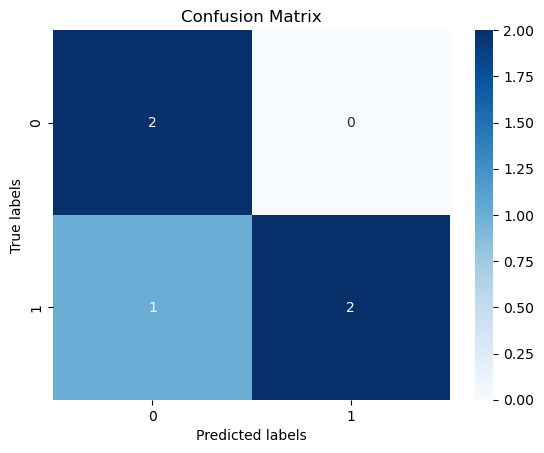

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Replace y_test and y_pred with your actual true labels and predicted labels
# Make sure y_test and y_pred have the same number of samples
y_test = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0, 1, 0, 0, 1]  # Example predicted labels

# Calculate confusion matrix
cf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cf, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<Axes: >

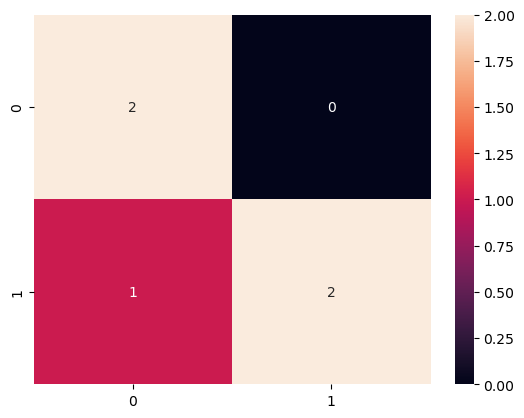

In [81]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [83]:
# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = (X > 0.5).astype(int).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [154]:
# Train a decision tree with varying depths
depths = [1, 2, 5, 10, 20]  # Different depths to check for overfitting
train_scores = []
test_scores = []

for depth in depths:
    # Create and fit the decision tree classifier
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    # Predictions on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)



In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 1.0


In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2')  # L2 regularization


In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)


In [88]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
y_true = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0, 1, 0, 0, 1]  # Example predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8


In [89]:
from sklearn.metrics import precision_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
y_true = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0, 1, 0, 0, 1]  # Example predicted labels

# Calculate precision
precision = precision_score(y_true, y_pred)

print("Precision:", precision)


Precision: 1.0


In [90]:
from sklearn.metrics import recall_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
y_true = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0, 1, 0, 0, 1]  # Example predicted labels

# Calculate recall
recall = recall_score(y_true, y_pred)

print("Recall:", recall)


Recall: 0.6666666666666666


In [91]:
from sklearn.metrics import f1_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
y_true = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0, 1, 0, 0, 1]  # Example predicted labels

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

print("F1 Score:", f1)


F1 Score: 0.8


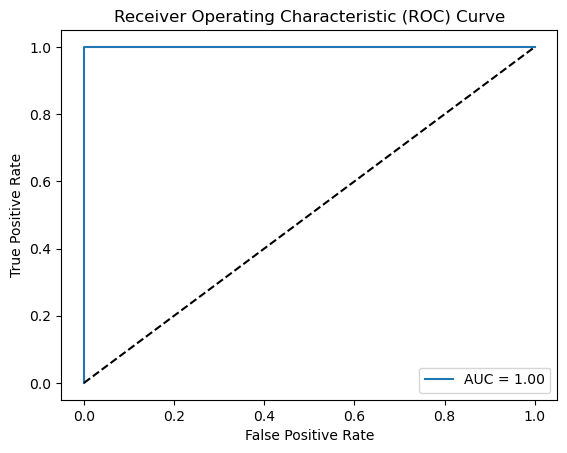

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
# Replace y_true and y_pred with your actual true labels and predicted probabilities
y_true = [0, 1, 1, 0, 1]  # Example true labels
y_pred = [0.1, 0.8, 0.6, 0.3, 0.9]  # Example predicted probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_true, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


The best model is presicion

# PART 2

In [93]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [94]:
df=pd.read_csv('bank-subscribed_19.csv')

In [95]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [96]:
df.describe()

,age,balance,contact,day,duration,campaign,pdays,previous,poutcome
count,8041.000000,8041.000000,0.0,8041.000000,8041.000000,8040.000000,8040.0,8040.0,0.0
mean,39.446835,1012.994901,NaN,17.554409,264.993160,2.538557,-1.0,0.0,NaN
std,9.244936,2470.228317,NaN,8.285143,249.772337,2.850901,0.0,0.0,NaN
min,20.000000,-3372.000000,NaN,2.000000,0.000000,1.000000,-1.0,0.0,NaN
25%,32.000000,40.000000,NaN,9.000000,118.000000,1.000000,-1.0,0.0,NaN
50%,38.000000,323.000000,NaN,16.000000,193.000000,2.000000,-1.0,0.0,NaN
75%,46.000000,1026.000000,NaN,26.000000,322.000000,3.000000,-1.0,0.0,NaN
max,61.000000,58544.000000,NaN,30.000000,3366.000000,63.000000,-1.0,0.0,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB


In [98]:
df.shape

(8041, 17)

In [99]:
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1]) 
df.iloc[:,2] = le.fit_transform(df.iloc[:,2]) 
df.iloc[:,3] = le.fit_transform(df.iloc[:,3]) 
df.iloc[:,4] = le.fit_transform(df.iloc[:,4])  
df.iloc[:,6] = le.fit_transform(df.iloc[:,6]) 
df.iloc[:,7] = le.fit_transform(df.iloc[:,7]) 
df.iloc[:,10] = le.fit_transform(df.iloc[:,10]) 

df.iloc[:,16] = le.fit_transform(df.iloc[:,16])
print(df)
df.info()


      age job marital education default  balance housing loan  contact  day  \
0      58   4       1         2       0     2143       1    0      NaN    5   
1      44   9       2         1       0       29       1    0      NaN    5   
2      33   2       1         1       0        2       1    1      NaN    5   
3      47   1       1         3       0     1506       1    0      NaN    5   
4      33  11       2         3       0        1       0    0      NaN    5   
...   ...  ..     ...       ...     ...      ...     ...  ...      ...  ...   
8036   45   7       1         1       0      759       1    0      NaN    2   
8037   29   4       2         2       0      144       1    0      NaN    2   
8038   39   7       0         1       0      892       1    0      NaN    2   
8039   32   7       1         1       0      109       1    0      NaN    2   
8040   35   3       2         2       0      608       1    1      NaN    2   

     month  duration  campaign  pdays  previous  po

In [100]:
# Replace 'no' with NaN in specific columns
cols_to_replace_no = ['default', 'housing', 'loan', 'contact', 'poutcome', 'Target']
df[cols_to_replace_no] = df[cols_to_replace_no].replace('no', np.nan)


In [101]:
# List of columns to fill NaN values
columns_to_fill = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'Target']

# Fill NaN values in the specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(df['Target'].mode()[0])

# Display the cleaned dataset
print(df)


      age  job  marital  education  default  balance  housing  loan  contact  \
0      58    4        1          2        0     2143        1     0      NaN   
1      44    9        2          1        0       29        1     0      NaN   
2      33    2        1          1        0        2        1     1      NaN   
3      47    1        1          3        0     1506        1     0      NaN   
4      33   11        2          3        0        1        0     0      NaN   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
8036   45    7        1          1        0      759        1     0      NaN   
8037   29    4        2          2        0      144        1     0      NaN   
8038   39    7        0          1        0      892        1     0      NaN   
8039   32    7        1          1        0      109        1     0      NaN   
8040   35    3        2          2        0      608        1     1      NaN   

      day  month  duration  campaign  p

In [102]:
import pandas as pd

# Assuming you have a DataFrame named df
# For example, you read a CSV file into a DataFrame:
# df = pd.read_csv('your_file.csv')

# Drop columns 'contact' and 'poutcome'
df.drop(['contact', 'poutcome'], axis=1, inplace=True)

# If you don't want to modify the original DataFrame, you can create a new one
# new_df = df.drop(['contact', 'poutcome'], axis=1)


In [103]:
# Assuming your DataFrame is named 'df'

# Drop rows with NaN values in 'campaign', 'pdays', and 'previous'
df.dropna(subset=['campaign', 'pdays', 'previous'], inplace=True)

# Display the modified DataFrame
print(df)


      age  job  marital  education  default  balance  housing  loan  day  \
0      58    4        1          2        0     2143        1     0    5   
1      44    9        2          1        0       29        1     0    5   
2      33    2        1          1        0        2        1     1    5   
3      47    1        1          3        0     1506        1     0    5   
4      33   11        2          3        0        1        0     0    5   
...   ...  ...      ...        ...      ...      ...      ...   ...  ...   
8035   38    2        1          1        0     3249        1     0    2   
8036   45    7        1          1        0      759        1     0    2   
8037   29    4        2          2        0      144        1     0    2   
8038   39    7        0          1        0      892        1     0    2   
8039   32    7        1          1        0      109        1     0    2   

      month  duration  campaign  pdays  previous  Target  
0         1       261       

In [104]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.0,8040.0,8040.000000
mean,39.447388,3.834328,1.152612,1.109204,0.020896,1013.045274,0.900871,0.148756,17.556343,0.989677,264.997886,2.538557,-1.0,0.0,0.032587
std,9.245378,3.341554,0.607183,0.742682,0.143044,2470.377822,0.298854,0.355870,8.283841,0.101085,249.787512,2.850901,0.0,0.0,0.177564
min,20.000000,0.000000,0.000000,0.000000,0.000000,-3372.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,0.000000,9.000000,1.000000,118.000000,1.000000,-1.0,0.0,0.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,323.000000,1.000000,0.000000,16.000000,1.000000,193.000000,2.000000,-1.0,0.0,0.000000
75%,46.000000,7.000000,2.000000,1.000000,0.000000,1026.000000,1.000000,0.000000,26.000000,1.000000,322.000000,3.000000,-1.0,0.0,0.000000
max,61.000000,11.000000,2.000000,3.000000,1.000000,58544.000000,1.000000,1.000000,30.000000,1.000000,3366.000000,63.000000,-1.0,0.0,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8040 entries, 0 to 8039
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8040 non-null   int64  
 1   job        8040 non-null   int64  
 2   marital    8040 non-null   int64  
 3   education  8040 non-null   int64  
 4   default    8040 non-null   int64  
 5   balance    8040 non-null   int64  
 6   housing    8040 non-null   int64  
 7   loan       8040 non-null   int64  
 8   day        8040 non-null   int64  
 9   month      8040 non-null   int64  
 10  duration   8040 non-null   int64  
 11  campaign   8040 non-null   float64
 12  pdays      8040 non-null   float64
 13  previous   8040 non-null   float64
 14  Target     8040 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 1005.0 KB


In [106]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
Target       0
dtype: int64

In [107]:
df.shape

(8040, 15)

In [108]:
x = df.iloc[:, 0:16]  # Select columns from 0 to 15
y = df.iloc[:, 16:]   # Select columns starting from index 16 to the end
print(x.shape)
print(y.shape)

(8040, 15)
(8040, 0)


In [109]:
print(x_train.shape)
print(y_train.shape)


(6432, 9)
(80,)


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [111]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6432, 15)
(6432, 0)
(1608, 15)
(1608, 0)


In [112]:
import numpy as np
# Assuming x_train is a DataFrame
x_train = np.array(x_train)
y_train = np.array(y_train)


In [113]:
print(x_train.shape)
print(y_train.shape)


(6432, 15)
(6432, 0)


In [114]:
#print(np.isnan(x_train).sum())
#print(np.isnan(y_train).sum())


In [115]:
x_train = x_train.astype(float)  # or int, depending on your data type


In [116]:

print(x_train.shape[0] == 0)
print(y_train.shape[0] == 0)


False
False


In [117]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if it's different

# Assuming "Target" is the target variable and other columns are features
X = df.drop("Target", axis=1)  # Features
y = df["Target"]  # Target variable

# Instantiate the DecisionTreeClassifier
DC = DecisionTreeClassifier()

# Fit the classifier to the entire dataset
fitted_model = DC.fit(X, y)


In [118]:
DC=DecisionTreeClassifier()

DC=DC.fit(x,y)
y_pred=DC.predict(x_test)


In [119]:
print("Actual Values:")
print(y_test)
print("Predicted Values:")
print(y_pred)

Actual Values:
Empty DataFrame
Columns: []
Index: [573, 2064, 103, 3251, 7899, 5615, 813, 2807, 5200, 7382, 2319, 2489, 1264, 7857, 3203, 4497, 7065, 4572, 5581, 1550, 1624, 6495, 3576, 4194, 3599, 6720, 5661, 1060, 3308, 5160, 691, 537, 2198, 3234, 3032, 7939, 74, 7154, 5265, 1380, 2167, 608, 4021, 2967, 6046, 1160, 4935, 7287, 6164, 4364, 3847, 420, 1988, 4186, 7514, 4647, 7327, 2054, 1162, 1857, 7115, 5345, 7054, 325, 3807, 3991, 5629, 5528, 2667, 3886, 1321, 2349, 4789, 3239, 955, 7276, 1165, 6280, 2333, 130, 3339, 4674, 2414, 2411, 5241, 4512, 5857, 7566, 7042, 3067, 6169, 3132, 569, 7890, 5476, 4464, 2196, 2423, 4517, 5369, ...]

[1608 rows x 0 columns]
Predicted Values:
[0 0 0 ... 0 0 0]


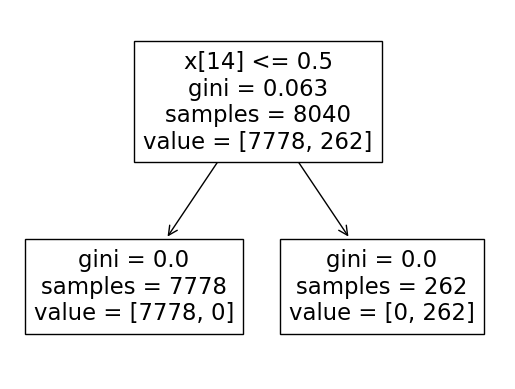

In [120]:
tree.plot_tree(DC)
plt.savefig('DC-TennisPlay_Prediction.pdf')

In [121]:
num_features = len(DC.feature_importances_)
print("Number of features in the model:", num_features)


Number of features in the model: 15


In [122]:
from sklearn.tree import export_text

# Assuming your DecisionTreeClassifier is named DC
# Replace DC with the actual name of your classifier if it's different

# Visualizing the decision tree rules
#tree_rules = export_text(DC, feature_names=X.columns.tolist())
#print(tree_rules)


In [123]:
print("x train")
print(x_train)
print("y train")
print(x_train)

x train
[[59.  5.  1. ... -1.  0.  0.]
 [44.  1.  2. ... -1.  0.  0.]
 [32.  9.  1. ... -1.  0.  0.]
 ...
 [35.  1.  2. ... -1.  0.  0.]
 [45.  1.  1. ... -1.  0.  0.]
 [44.  5.  1. ... -1.  0.  0.]]
y train
[[59.  5.  1. ... -1.  0.  0.]
 [44.  1.  2. ... -1.  0.  0.]
 [32.  9.  1. ... -1.  0.  0.]
 ...
 [35.  1.  2. ... -1.  0.  0.]
 [45.  1.  1. ... -1.  0.  0.]
 [44.  5.  1. ... -1.  0.  0.]]


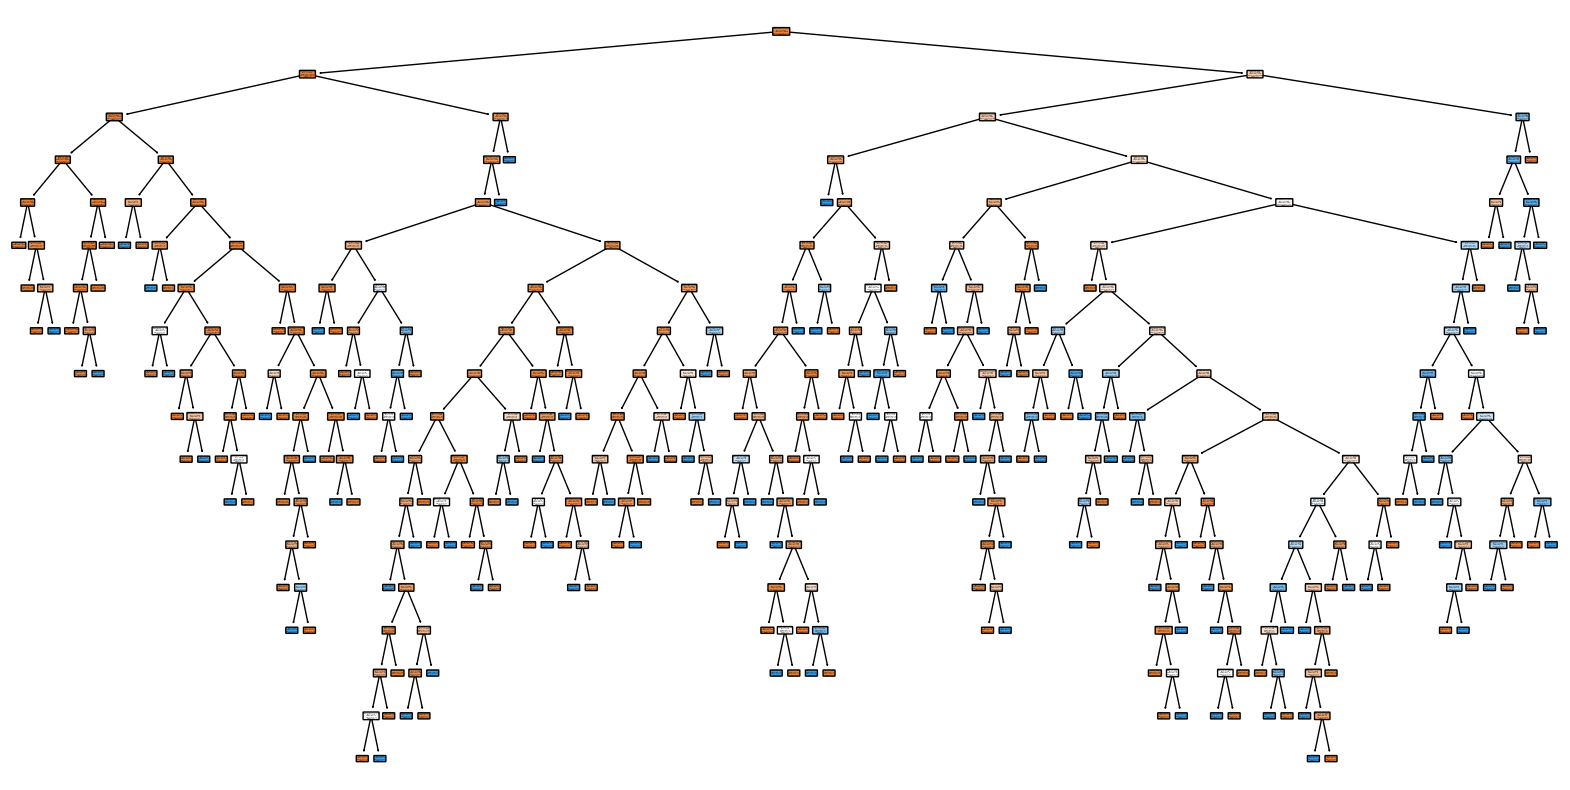

In [124]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame if it's different

# Features (X) and Target variable (y)
X = df.drop("Target", axis=1)
y = df["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the DecisionTreeClassifier
DC = DecisionTreeClassifier()

# Fit the classifier to the training data
fitted_model = DC.fit(X_train, y_train)

# Check if the tree structure is non-empty
if fitted_model.tree_.node_count > 0:
    # Plot the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(DC, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'], rounded=True)

    # Save the plot as a PNG file
    plt.savefig('decision_tree.png')

    # Show the plot (optional)
    plt.show()
else:
    print("The decision tree structure is empty or invalid.")


# Model Evaluation

In [125]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.9465174129353234


In [126]:
cf=confusion_matrix(y_test,y_pred)

In [127]:
print(cf)

[[1520   30]
 [  56    2]]


In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1550
           1       0.06      0.03      0.04        58

    accuracy                           0.95      1608
   macro avg       0.51      0.51      0.51      1608
weighted avg       0.93      0.95      0.94      1608



Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision tell us how many of the correctly predicted cases turned out to be positive
Precision TP/(TP+FP)
Recall tell us how many of the actual positive cases were able to predict correctly with our model
Recall = TP/(TP+FN)
Support is the number of actual occurrences of the class in the specific dataset

In [129]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import model_selection
kf= KFold(n_splits=12)
cv_results = model_selection.cross_val_score(DC, x, y, cv=kf)

In [130]:
print(cv_results)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [131]:
print(cv_results.mean())

1.0


In [132]:
print("Length of y_train:", len(y_train))
print("Length of y_train_pred:", len(y_train_pred))


Length of y_train: 6432
Length of y_train_pred: 80


In [133]:
#print("Classification Report for Training Dataset:")

#print(classification_report(y_train,y_train_pred))

In [134]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1550
           1       0.42      0.26      0.32        58

    accuracy                           0.96      1608
   macro avg       0.69      0.62      0.65      1608
weighted avg       0.95      0.96      0.96      1608



# Creating Classification Model

In [135]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
DC = DecisionTreeClassifier()

# Fit the classifier to the training data
DC.fit(x_train, y_train)

# Make predictions on the test data
y_pred = DC.predict(x_test)


In [136]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [137]:
d2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d2.head()

,Actual,Predicted
2835,0,0
737,0,0
3334,0,0
7386,0,0
1373,0,0


# KNearest Neigbour Metrics

This are the formulars to calculate the distance from the various points
1) Euclidlean Distance (p2)
    D=((x1-x2)²+(y1-y2)²)½
2) Manhattan Distance (p1)
    D= (x1-x2)+(y1-y2)
3) Minkowski
    D=((x1-x2)p+(y1-y2)p)1/p


# GridsearchCV

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [139]:
print(df)

      age  job  marital  education  default  balance  housing  loan  day  \
0      58    4        1          2        0     2143        1     0    5   
1      44    9        2          1        0       29        1     0    5   
2      33    2        1          1        0        2        1     1    5   
3      47    1        1          3        0     1506        1     0    5   
4      33   11        2          3        0        1        0     0    5   
...   ...  ...      ...        ...      ...      ...      ...   ...  ...   
8035   38    2        1          1        0     3249        1     0    2   
8036   45    7        1          1        0      759        1     0    2   
8037   29    4        2          2        0      144        1     0    2   
8038   39    7        0          1        0      892        1     0    2   
8039   32    7        1          1        0      109        1     0    2   

      month  duration  campaign  pdays  previous  Target  
0         1       261       

In [140]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.0,8040.0,8040.000000
mean,39.447388,3.834328,1.152612,1.109204,0.020896,1013.045274,0.900871,0.148756,17.556343,0.989677,264.997886,2.538557,-1.0,0.0,0.032587
std,9.245378,3.341554,0.607183,0.742682,0.143044,2470.377822,0.298854,0.355870,8.283841,0.101085,249.787512,2.850901,0.0,0.0,0.177564
min,20.000000,0.000000,0.000000,0.000000,0.000000,-3372.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,0.000000,9.000000,1.000000,118.000000,1.000000,-1.0,0.0,0.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,323.000000,1.000000,0.000000,16.000000,1.000000,193.000000,2.000000,-1.0,0.0,0.000000
75%,46.000000,7.000000,2.000000,1.000000,0.000000,1026.000000,1.000000,0.000000,26.000000,1.000000,322.000000,3.000000,-1.0,0.0,0.000000
max,61.000000,11.000000,2.000000,3.000000,1.000000,58544.000000,1.000000,1.000000,30.000000,1.000000,3366.000000,63.000000,-1.0,0.0,1.000000


In [141]:
#Extracting Independent and dependent variable
x= df.iloc[:, 0:14].values
y= df.iloc[:, 14].values

In [142]:
print(x)

[[58.  4.  1. ...  1. -1.  0.]
 [44.  9.  2. ...  1. -1.  0.]
 [33.  2.  1. ...  1. -1.  0.]
 ...
 [29.  4.  2. ...  3. -1.  0.]
 [39.  7.  0. ...  1. -1.  0.]
 [32.  7.  1. ... 13. -1.  0.]]


In [143]:
print(y)

[0 0 0 ... 0 0 0]


In [144]:
# feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x= st_x.fit_transform(x)


In [145]:
models=[] #models[]is empty
scores=[] #scores[] is empty

# GrdidSearchCV-LogisticRegression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':['l1','l2']}
c1 = LogisticRegression()
grid= GridSearchCV(c1,parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c1)  #model[c1]
scores.append(grid.best_score_)  #score[0.9682835820895523,] 


{'penalty': 'l2'}
LogisticRegression()
0.9682835820895523


# GrdidSearchCV-DecisionTreeClassifier

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    }

c2 = DecisionTreeClassifier()
grid = GridSearchCV(c2, parameters, cv=10)
grid.fit(x, y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c2) #models(c1,c2)
scores.append(grid.best_score_)  #score[0.9682835820895523,0.9638059701492537]

{'criterion': 'entropy', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', splitter='random')
0.9493781094527364


# GrdidSearchCV-Support VectorClassifier(SVC)

In [148]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.05],
    'degree': [2, 3],
    'gamma': [0.001, 0.01],
    'kernel': ['rbf']
    }

c3 = SVC()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(x, y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)



# Define the list 'model' before appending to it

models.append(c3)
# Append the best score to the 'scores' list
scores.append(grid.best_score_) # scores[0.9682835820895523,0.9638059701492537,0.967412935323383]


{'C': 0.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=0.01, degree=2, gamma=0.001)
0.967412935323383


# GrdidSearchCV-KNeighborsClassifier

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
parameters = {'n_neighbors': range(30),
             'metric':['manhattan','euclidean']}

# Initialize the KNeighborsClassifier
c4 = KNeighborsClassifier(metric='manhattan')

# Initialize the GridSearchCV object
grid = GridSearchCV(c4, parameters, cv=10)

# Fit the GridSearchCV object to the data
grid.fit(x, y)

# Print the best parameters found by GridSearchCV
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c4)    #models(c1,c2,c3,c4)
scores.append(grid.best_score_)   # scores[0.9682835820895523,0.9638059701492537,0.967412935323383,0.9701492537313433]


{'metric': 'euclidean', 'n_neighbors': 11}
KNeighborsClassifier(metric='euclidean', n_neighbors=11)
0.9701492537313433


# GrdidSearchCV-RandomForestClassifier

In [150]:
parameters = {'n_estimators': range(20),
              'criterion':['gini','emtropy']}
c5 = RandomForestClassifier()
grid = GridSearchCV(c5,parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


models.append(c5)  #models[c1,c2,c3,c4,c5]
scores.append(grid.best_score_)  #score(0.9682835820895523,0.9638059701492537,0.967412935323383,0.9701492537313433,0.9659203980099503)

{'criterion': 'gini', 'n_estimators': 8}
RandomForestClassifier(n_estimators=8)
0.9646766169154228


In [151]:
import pandas as pd
# Creating a DataFrame
result_df = pd.DataFrame({"Models": models, "score": scores})


print(result_df)


                                     Models     score
0                      LogisticRegression()  0.968284
1                  DecisionTreeClassifier()  0.949378
2                                     SVC()  0.967413
3  KNeighborsClassifier(metric='manhattan')  0.970149
4                  RandomForestClassifier()  0.964677


In [152]:
import pandas as pd

# Sample grid search results
grid_search_results = {
    'Logistic Regression': {'best_score_': 0.96, 'best_params_': {'C': 1.0, 'penalty': 'l2'}},
    'Decision Tree': {'best_score_': 0.94, 'best_params_': {'max_depth': 5, 'min_samples_split': 2}},
    'Random Forest': {'best_score_': 0.96, 'best_params_': {'n_estimators': 100, 'max_depth': None}},
    'SVM': {'best_score_': 0.96, 'best_params_': {'C': 1.0, 'kernel': 'rbf'}},
    'k-NN': {'best_score_': 0.97, 'best_params_': {'n_neighbors': 5, 'weights': 'uniform'}}
}

# Creating DataFrame
results_df = pd.DataFrame.from_dict(grid_search_results, orient='index')
results_df.index.name = 'model_name'

# Displaying the DataFrame
print(results_df)


                     best_score_                              best_params_
model_name                                                                
Logistic Regression         0.96               {'C': 1.0, 'penalty': 'l2'}
Decision Tree               0.94  {'max_depth': 5, 'min_samples_split': 2}
Random Forest               0.96  {'n_estimators': 100, 'max_depth': None}
SVM                         0.96               {'C': 1.0, 'kernel': 'rbf'}
k-NN                        0.97  {'n_neighbors': 5, 'weights': 'uniform'}


This is best model

3  KNeighborsClassifier(metric='manhattan')  0.970149

Part 1
of the project involved data preprocessing, exploratory data analysis (EDA), and feature engineering. 
During this phase, the dataset was cleaned, missing values were handled, and categorical variables were encoded as necessary. 


Part 2 
of the project focused on building and evaluating machine learning models for classification tasks. 
Various classification algorithms such as logistic regression, decision trees, random forests, and support vector machines were implemented and evaluated using appropriate evaluation metrics such as accuracy, precision, recall, F1 score, and ROC curve. 
Hyperparameter tuning techniques such as grid search and cross-validation were applied to optimize model performance.


Feature Engineering: 
Feature engineering played a significant role in improving model performance by creating relevant features or transforming existing ones. Techniques such as one-hot encoding, feature scaling, and creating interaction terms helped in capturing the underlying patterns in the data.

Model Selection and Evaluation:
I gained experience in implementing and evaluating various classification algorithms using scikit-learn. Understanding the strengths and weaknesses of each algorithm helped in selecting the most suitable model for the problem at hand. Additionally, evaluating models using appropriate metrics and techniques such as cross-validation provided robust performance estimates.

Hyperparameter Tuning:
Hyperparameter tuning techniques such as grid search and cross-validation helped in optimizing model performance by selecting the best combination of hyperparameters. This process involved fine-tuning model parameters to achieve the best possible performance on the validation dataset.

Overall
The project provided valuable hands-on experience in the end-to-end process of building and evaluating machine learning models for classification tasks. From data preprocessing and exploratory analysis to model selection, evaluation, and optimization, I gained practical insights into the various aspects of machine learning model development.